In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Custom Libs
from utils import diff, check_stationality, yeo_johnson

plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')

df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')

SPLIT = 10

X_train = df.iloc[:-SPLIT, 1:]
X_test = df.iloc[-SPLIT:, 1:]

y_train = df.iloc[:-SPLIT, 0]
y_test = df.iloc[-SPLIT:, 0]


## Scaling 
for col in X_train.columns :
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[[col]])
    X_test[col] = ss.transform(X_test[[col]])

ss = StandardScaler()
y_train = ss.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss.transform(y_test.values.reshape(-1, 1))

pca_obj1 = ['외환보유액','FTSE','MSCI']
pca_obj2 = ['외평채_2013','외평채_2014_04','외평채_2014_09','외평채_2015','외평채_2016','외평채_2019']
pca_obj3 = ['외평채_2023','외평채_2024','외평채_2027','외평채_2028','외평채_2029','외평채_2044','외평채_2048']
pca_obj4 = ['국고채_3년', '국고채_5년', '국고채_10년','회사채_3년']
pca_obj5 = ['CD', '콜금리', '기준금리']

obj_lst_n_1 = [pca_obj1, pca_obj4, pca_obj5]

pca_X_train = pd.DataFrame()
pca_X_test = pd.DataFrame()

## 축 1개로도 90% 넘게 설명 가능한 변수들 압축
for idx, objects in enumerate(obj_lst_n_1) :        
    pca = PCA(n_components=1)
    pcaed = pca.fit_transform(X_train[objects])
    pcaed_df = pd.DataFrame(pcaed, columns = [f'PCA_{idx}'])
    print(f'✅ PCA_{idx}의 설명력 {pca.explained_variance_ratio_}')
    pca_X_train = pd.concat([pca_X_train, pcaed_df], axis=1)
    
    pcaed_test = pca.transform(X_test[objects])
    pcaed_test_df = pd.DataFrame(pcaed_test, columns = [f'PCA_TEST_{idx}'])
    pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.columns = ['투자지수', '국고채관련', '금리관련']
pca_X_test.columns = ['투자지수', '국고채관련', '금리관련']

## 과거 외평채 압축
pca2 = PCA(n_components=2)
pcaed2 = pca2.fit_transform(X_train[pca_obj2])
pcaed2_df = pd.DataFrame(pcaed2, columns =['과거_외평채_1', '과거_외평채_2'])
pcaed_test = pca2.transform(X_test[pca_obj2])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['과거_외평채_1', '과거_외평채_2'])

pca_X_train = pd.concat([pca_X_train, pcaed2_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

print(f'✅ 과거 외평채 압축 변수의 설명력 {sum(pca2.explained_variance_ratio_)}')

## 미래 외평채 압축
pca3 = PCA(n_components=3)
pcaed3 = pca3.fit_transform(X_train[pca_obj3])
pcaed3_df = pd.DataFrame(pcaed3, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])
pcaed_test = pca3.transform(X_test[pca_obj3])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])

pca_X_train = pd.concat([pca_X_train, pcaed3_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.index = X_train.index
pca_X_test.index = X_test.index

print(f'✅ 미래 외평채 압축 변수의 설명력 {sum(pca3.explained_variance_ratio_)}')
pca_X_train


✅ PCA_0의 설명력 [0.95832035]
✅ PCA_1의 설명력 [0.97443849]
✅ PCA_2의 설명력 [0.99367322]
✅ 과거 외평채 압축 변수의 설명력 0.9381292413258056
✅ 미래 외평채 압축 변수의 설명력 0.9354900720680198


,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3
Date,,,,,,,,
200408월,-3.436100,1.086016,1.419392,-1.282598,0.488632,-1.378295,-0.580920,0.075974
200409월,-3.348098,0.756313,1.307003,-0.811470,0.786655,-1.378295,-0.580920,0.075974
200410월,-3.329834,0.650030,1.307003,-1.010501,0.643383,-1.378295,-0.580920,0.075974
200411월,-3.158385,0.478468,1.069033,-0.927464,0.701124,-1.378295,-0.580920,0.075974
200412월,-3.081510,0.298804,1.024587,-0.922329,0.708523,-1.378295,-0.580920,0.075974
...,...,...,...,...,...,...,...,...
202107월,4.166124,-2.209853,-2.614287,-1.607455,0.214712,2.250132,-1.157698,0.158905
202108월,4.143199,-2.267957,-2.452837,-1.607455,0.214712,2.158359,-1.132095,0.126700
202109월,3.819201,-2.091156,-2.268776,-1.607455,0.214712,2.300956,-0.554768,-0.117054


In [22]:
res_df_tr = X_train[['연준금리', 'AAII', 'VIX']]
ree_df_te = X_test[['연준금리', 'AAII', 'VIX']]
pca_X_train = pd.concat([pca_X_train, res_df_tr], axis=1)
pca_X_test = pd.concat([pca_X_test, ree_df_te], axis=1)


In [23]:
out_lst, p_vales_df = check_stationality(pca_X_train)

p_vales_df

정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.010,0.728,False
국고채관련,0.010,0.735,False
금리관련,0.010,0.469,False
과거_외평채_1,0.010,0.293,False
과거_외평채_2,0.061,0.036,True
미래_외평채_1,0.010,0.566,False
미래_외평채_2,0.039,0.446,False
미래_외평채_3,0.100,0.000,True
연준금리,0.010,0.038,False
AAII,0.100,0.000,True


In [24]:
diff_df_pca = diff(pca_X_train, out_lst, lag=1)
out_lst, p_value_diff_pca_df = check_stationality(diff_df_pca)
p_value_diff_pca_df

차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.100,0.000,True
국고채관련,0.100,0.004,True
금리관련,0.100,0.000,True
과거_외평채_1,0.100,0.000,True
과거_외평채_2,0.063,0.034,True
미래_외평채_1,0.100,0.000,True
미래_외평채_2,0.100,0.000,True
미래_외평채_3,0.100,0.000,True
연준금리,0.100,0.005,True
AAII,0.100,0.000,True


In [25]:
new_y_train = pd.DataFrame(y_train).diff(1).dropna()

diff_df_pca['Target'] = new_y_train.values
diff_df_pca

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX,Target
Date,,,,,,,,,,,,
200409월,0.088002,-0.329703,-1.123890e-01,0.471129,0.786655,8.437695e-15,-8.881784e-16,0.075974,0.106548,0.937641,-0.688125,0.047854
200410월,0.018264,-0.106283,2.220446e-16,-0.199032,0.643383,-5.773160e-15,2.775558e-15,0.075974,0.093835,1.220525,-0.345024,-0.011485
200411월,0.171449,-0.171562,-2.379705e-01,0.083038,0.701124,0.000000e+00,-1.110223e-15,0.075974,0.104126,2.444238,-0.699835,0.049768
200412월,0.076876,-0.179664,-4.444561e-02,0.005135,0.708523,0.000000e+00,5.551115e-16,0.075974,0.135607,2.420399,-0.693980,0.003828
200501월,0.083199,0.631334,2.927856e-02,-0.069198,0.660406,-1.332268e-15,0.000000e+00,0.075974,0.074463,-0.573327,-0.749016,0.068272
...,...,...,...,...,...,...,...,...,...,...,...,...
202107월,-0.233468,-0.008871,2.175670e-02,0.000000,0.214712,-1.353920e-01,4.198318e-02,0.158905,0.012713,0.683363,-0.114338,-0.199711
202108월,-0.022924,-0.058104,1.614496e-01,0.000000,0.214712,-9.177373e-02,2.560235e-02,0.126700,-0.003027,-0.038946,-0.320433,-0.083585
202109월,-0.323998,0.176802,1.840614e-01,0.000000,0.214712,1.425974e-01,5.773272e-01,-0.117054,-0.008475,-0.597563,0.459331,-0.183121


In [35]:
from VARMAX_reg import VARMaxModel

varmax = VARMaxModel(df = diff_df_pca)
varmax.check_order(train_df = diff_df_pca)

## order =1 로 결정

최소값이 제일 많은 order를 선택하세요
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -28.73      -28.53   3.338e-13      -28.65
1       -33.82     -31.20*  2.059e-15*     -32.76*
2       -33.76      -28.73   2.209e-15      -31.72
3       -33.51      -26.06   2.957e-15      -30.49
4       -33.35      -23.48   3.759e-15      -29.35
5       -33.01      -20.72   6.009e-15      -28.03
6       -32.83      -18.13   8.712e-15      -26.88
7       -32.82      -15.70   1.185e-14      -25.88
8       -33.31      -13.77   1.097e-14      -25.40
9       -33.78      -11.83   1.207e-14      -24.90
10      -34.68      -10.31   1.089e-14      -24.81
11      -35.77      -8.982   1.091e-14      -24.92
12     -37.68*      -8.474   7.508e-15      -25.85
--------------------------------------------------


In [48]:
model = varmax.train(train_df=diff_df_pca, order=5)

KeyboardInterrupt: 

In [ ]:
preds = varmax.forecast(fitted_model=model, train_df=diff_df_pca)
preds

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX,Target
207,-0.023905,-0.055979,-0.063656,-0.117295,0.349757,0.160419,-0.053791,0.353101,-0.006316,0.591061,0.818544,-0.018442
208,0.019211,-0.061355,-0.078905,0.012987,0.243068,0.144571,-0.034256,0.298739,-0.014111,0.241479,0.662374,0.004117
209,0.030363,-0.043091,-0.068872,0.001189,0.152089,0.086473,-0.023293,0.254704,-0.015993,0.051103,0.524011,0.013117
210,0.035580,-0.037821,-0.058459,-0.014023,0.096374,0.049717,-0.019535,0.220908,-0.014724,-0.039173,0.414314,0.017662
211,0.037680,-0.035367,-0.050284,-0.019413,0.059589,0.030805,-0.017638,0.194605,-0.012819,-0.072621,0.329649,0.019715
212,0.038041,-0.032767,-0.043814,-0.021496,0.034171,0.021830,-0.016052,0.173273,-0.010941,-0.078279,0.263608,0.020382
213,0.037614,-0.030148,-0.038594,-0.022183,0.016627,0.017992,-0.014630,0.155313,-0.009254,-0.072015,0.211280,0.020370
214,0.036895,-0.027722,-0.034337,-0.021948,0.004702,0.016674,-0.013365,0.139815,-0.007818,-0.061510,0.169391,0.020065
215,0.036115,-0.025560,-0.030857,-0.021136,-0.003174,0.016507,-0.012246,0.126243,-0.006645,-0.050281,0.135694,0.019661
216,0.035380,-0.023678,-0.028025,-0.020007,-0.008109,0.016811,-0.011259,0.114259,-0.005714,-0.039836,0.108560,0.019249


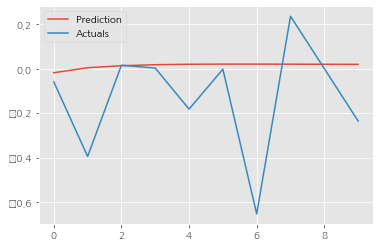

In [ ]:
varmax.plot_predictions(preds=preds['Target'], actuals=diff_y_test)

In [39]:
temp_y = diff_df_pca.iloc[-1, -1]

diff_y_test = pd.DataFrame(y_test).diff(1).dropna().values
diff_y_test = [i[0] for i in diff_y_test]
diff_y_test.insert(0, temp_y)

diff_y_test = np.array(diff_y_test)
diff_y_test


array([-0.05933898, -0.39431711,  0.01531329,  0.00255221, -0.18184527,
       -0.00255221, -0.65272881,  0.23544177,  0.        , -0.23544177])